<img src="./assets/ga-logo.png" style="float: left; margin: 20px; height: 55px">

# Lab: Classification: Predicting Left-Handedness from Psychological Factors

---

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

One way to define the data science process is as follows:

1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.

We'll walk through a full data science problem in this lab. 

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

---
## Step 2: Obtain the data.

### Read in the file titled "data.csv":
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [2]:
dataset = pd.read_csv('data.csv', sep='\t', encoding_errors='ignore')
dataset

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,3,5,4,5,2,4,2,2,2,5,...,US,1,1,18,2,1,1,6,2,1
4180,1,5,1,5,1,4,2,4,1,4,...,US,1,1,18,2,2,1,3,2,1
4181,3,2,2,4,5,4,5,2,2,5,...,PL,2,2,22,2,1,1,6,1,1
4182,1,3,4,5,1,3,3,1,1,3,...,US,2,1,16,1,2,5,1,1,1


---

## Step 3: Explore the data.

### Conduct background research:

Domain knowledge is irreplaceable. Figuring out what information is relevant to a problem, or what data would be useful to gather, is a major part of any end-to-end data science project! For this lab, you'll be using a dataset that someone else has put together, rather than collecting the data yourself.

Do some background research about personality and handedness. What features, if any, are likely to help you make good predictions? How well do you think you'll be able to model this? Write a few bullet points summarizing what you believe, and remember to cite external sources.

You don't have to be exhaustive here. Do enough research to form an opinion, and then move on.

> You'll be using the answers to Q1-Q44 for modeling; you can disregard other features, e.g. country, age, internet browser.

### Conduct exploratory data analysis on this dataset:

If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

You might use this section to perform data cleaning if you find it to be necessary.

In [3]:
dataset

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,3,5,4,5,2,4,2,2,2,5,...,US,1,1,18,2,1,1,6,2,1
4180,1,5,1,5,1,4,2,4,1,4,...,US,1,1,18,2,2,1,3,2,1
4181,3,2,2,4,5,4,5,2,2,5,...,PL,2,2,22,2,1,1,6,1,1
4182,1,3,4,5,1,3,3,1,1,3,...,US,2,1,16,1,2,5,1,1,1


In [4]:
dataset.isnull().sum()

Q1             0
Q2             0
Q3             0
Q4             0
Q5             0
Q6             0
Q7             0
Q8             0
Q9             0
Q10            0
Q11            0
Q12            0
Q13            0
Q14            0
Q15            0
Q16            0
Q17            0
Q18            0
Q19            0
Q20            0
Q21            0
Q22            0
Q23            0
Q24            0
Q25            0
Q26            0
Q27            0
Q28            0
Q29            0
Q30            0
Q31            0
Q32            0
Q33            0
Q34            0
Q35            0
Q36            0
Q37            0
Q38            0
Q39            0
Q40            0
Q41            0
Q42            0
Q43            0
Q44            0
introelapse    0
testelapse     0
country        0
fromgoogle     0
engnat         0
age            0
education      0
gender         0
orientation    0
race           0
religion       0
hand           0
dtype: int64

In [5]:
dataset.dtypes

Q1              int64
Q2              int64
Q3              int64
Q4              int64
Q5              int64
Q6              int64
Q7              int64
Q8              int64
Q9              int64
Q10             int64
Q11             int64
Q12             int64
Q13             int64
Q14             int64
Q15             int64
Q16             int64
Q17             int64
Q18             int64
Q19             int64
Q20             int64
Q21             int64
Q22             int64
Q23             int64
Q24             int64
Q25             int64
Q26             int64
Q27             int64
Q28             int64
Q29             int64
Q30             int64
Q31             int64
Q32             int64
Q33             int64
Q34             int64
Q35             int64
Q36             int64
Q37             int64
Q38             int64
Q39             int64
Q40             int64
Q41             int64
Q42             int64
Q43             int64
Q44             int64
introelapse     int64
testelapse

In [6]:
df = dataset

In [7]:
dataset.describe(include='all')

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,...,4184,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.962715,3.829589,2.846558,3.186902,2.865440,3.672084,3.216539,3.184512,2.761233,3.522945,...,NaN,1.576243,1.239962,30.370698,2.317878,1.654398,1.833413,5.013623,2.394359,1.190966
std,1.360291,1.551683,1.664804,1.476879,1.545798,1.342238,1.490733,1.387382,1.511805,1.242890,...,NaN,0.494212,0.440882,367.201726,0.874264,0.640915,1.303454,1.970996,2.184164,0.495357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,...,NaN,1.000000,1.000000,18.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,...,NaN,2.000000,1.000000,21.000000,2.000000,2.000000,1.000000,6.000000,2.000000,1.000000
75%,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,...,NaN,2.000000,1.000000,27.000000,3.000000,2.000000,2.000000,6.000000,2.000000,1.000000


In [8]:
top_countries = df['country'].value_counts().nlargest(5).index
df['country'] = df['country'].where(df['country'].isin(top_countries), 'Other')
df = pd.get_dummies(df, columns=['country'], drop_first=True)

In [9]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,gender,orientation,race,religion,hand,country_CA,country_DE,country_GB,country_Other,country_US
0,4,1,5,1,5,1,5,1,4,1,...,1,1,3,2,3,False,False,False,False,True
1,1,5,1,4,2,5,5,4,1,5,...,2,2,6,1,1,True,False,False,False,False
2,1,2,1,1,5,4,3,2,1,4,...,1,1,1,1,2,False,False,False,True,False
3,1,4,1,5,1,4,5,4,3,5,...,2,5,3,2,2,False,False,False,False,True
4,5,1,5,1,5,1,5,1,3,1,...,1,1,3,2,3,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,3,5,4,5,2,4,2,2,2,5,...,1,1,6,2,1,False,False,False,False,True
4180,1,5,1,5,1,4,2,4,1,4,...,2,1,3,2,1,False,False,False,False,True
4181,3,2,2,4,5,4,5,2,2,5,...,1,1,6,1,1,False,False,False,True,False
4182,1,3,4,5,1,3,3,1,1,3,...,2,5,1,1,1,False,False,False,False,True


In [10]:
dataset[['introelapse','country','testelapse','fromgoogle','engnat','education','orientation','hand']]

,introelapse,country,testelapse,fromgoogle,engnat,education,orientation,hand
0,91,US,232,2,1,3,1,3
1,17,CA,247,2,1,1,2,1
2,11,Other,6774,2,2,4,1,2
3,14,US,1072,2,1,2,5,2
4,10,US,226,2,1,3,1,3
...,...,...,...,...,...,...,...,...
4179,6,US,366,1,1,2,1,1
4180,16,US,191,1,1,2,1,1
4181,8,Other,548,2,2,2,1,1
4182,39,US,255,2,1,1,5,1


In [11]:
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'introelapse', 'testelapse', 'fromgoogle',
       'engnat', 'age', 'education', 'gender', 'orientation', 'race',
       'religion', 'hand', 'country_CA', 'country_DE', 'country_GB',
       'country_Other', 'country_US'],
      dtype='object')

In [12]:
Qs = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44']

In [13]:
Qs_corr = df[Qs].corr()
Qs_corr

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44
Q1,1.000000,-0.122953,0.275952,-0.059956,0.199302,-0.077926,0.171270,-0.126194,0.241185,-0.060861,...,0.262361,-0.067786,0.173680,-0.055995,0.289857,-0.071714,0.164882,-0.060318,0.204523,-0.093743
Q2,-0.122953,1.000000,-0.022525,0.269484,-0.047038,0.164393,-0.087703,0.144536,-0.100711,0.148981,...,-0.088588,0.203214,-0.074854,0.236674,-0.044752,0.247000,-0.110787,0.233297,-0.016057,0.295313
Q3,0.275952,-0.022525,1.000000,0.066602,0.274843,-0.014071,0.218761,-0.114945,0.426548,-0.031226,...,0.355984,-0.008960,0.238196,-0.034152,0.493942,-0.043176,0.216282,0.003208,0.271362,-0.004790
Q4,-0.059956,0.269484,0.066602,1.000000,0.060759,0.083626,-0.041081,0.150241,-0.071340,0.056009,...,0.042714,0.239464,-0.065101,0.376782,0.024234,0.225209,-0.023465,0.330882,0.013079,0.341038
Q5,0.199302,-0.047038,0.274843,0.060759,1.000000,0.084040,0.253539,-0.043933,0.230943,0.011500,...,0.241392,-0.022182,0.177781,0.029725,0.243983,-0.010515,0.206042,0.018107,0.263067,0.011423
Q6,-0.077926,0.164393,-0.014071,0.083626,0.084040,1.000000,0.018769,0.088086,-0.033999,0.197395,...,0.015048,0.012612,0.086329,0.046228,-0.007897,-0.011361,0.032992,0.122136,0.038239,0.115399
Q7,0.171270,-0.087703,0.218761,-0.041081,0.253539,0.018769,1.000000,-0.065327,0.249843,-0.021778,...,0.217763,-0.082049,0.176275,-0.067577,0.203818,-0.086109,0.167565,-0.051565,0.186909,-0.061056
Q8,-0.126194,0.144536,-0.114945,0.150241,-0.043933,0.088086,-0.065327,1.000000,-0.087270,0.038581,...,-0.119473,0.205176,-0.104109,0.239085,-0.143172,0.180723,-0.094863,0.159205,-0.123787,0.165579
Q9,0.241185,-0.100711,0.426548,-0.071340,0.230943,-0.033999,0.249843,-0.087270,1.000000,0.006797,...,0.262599,-0.058661,0.261276,-0.122273,0.356453,-0.107189,0.186448,-0.071151,0.258486,-0.081128
Q10,-0.060861,0.148981,-0.031226,0.056009,0.011500,0.197395,-0.021778,0.038581,0.006797,1.000000,...,-0.016557,0.035458,0.085312,0.051069,-0.019054,0.046087,-0.032437,0.132747,0.026402,0.098441


<Axes: >

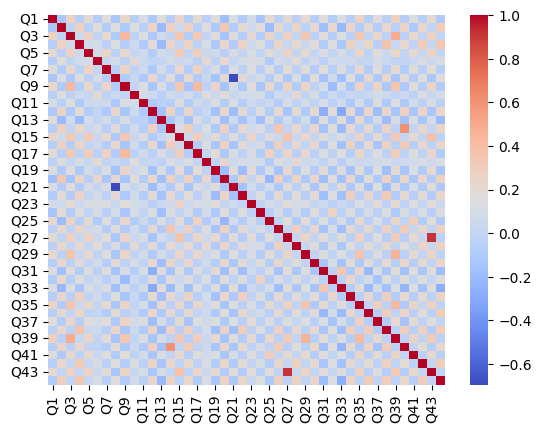

In [14]:
sns.heatmap(Qs_corr ,  cmap="coolwarm")

In [15]:
# To find the high correlated value and drop them
mask = np.triu(np.ones_like(Qs_corr, dtype=bool), k=1)
high_corr = Qs_corr.where(mask).stack()

strong_pairs = high_corr[high_corr > 0.7]
strong_pairs

Q27  Q43    0.918404
dtype: float64

In [16]:
reverse_pair = high_corr[high_corr < -0.6]
reverse_pair

Q8  Q21   -0.694484
dtype: float64

In [17]:
df.drop(columns='Q43', inplace = True)

### Short answer questions:

In this lab you'll use K-nearest neighbors and logistic regression to model handedness based off of psychological factors. Answer the following related questions; your answers may be in bullet points.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

To find whether it is classification or regression, we need to find the target. If the target is continuous data, then its regression
if the target value is classes, then its classification
In this case, its a Classification whether he will be right-handed or left-handed.

### 6. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

Yes it better to standardize the data because Some algorithms like KNN it work to calculate the distance between the predicted point and the nearest values, if we didn't scale the data and make it lower it will consume the alot becasue the number will be so high if we didn't 

### 7. Give an example of when we might not standardize our variables.

Age, or anything categorical like education 

### 8. Based on your answers to 6 and 7, do you think we should standardize our predictor variables in this case? Why or why not?

Yes, but only for some values specifically integer features. Do not scale predicted values, raw categorical, or boolean features.

### 9. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

In [18]:
df['hand'].value_counts()

hand
1    3542
2     452
3     179
0      11
Name: count, dtype: int64

In [19]:
df['hand'].value_counts(normalize=True)

hand
1    0.846558
2    0.108031
3    0.042782
0    0.002629
Name: proportion, dtype: float64

In [20]:
# So i want to put only two classes left handed and right-handed
df['hand'] = df['hand'].replace({2: 0, 3: 0})
df['hand'].value_counts(normalize=True)

hand
1    0.846558
0    0.153442
Name: proportion, dtype: float64

---

## Step 4 & 5 Modeling: $k$-nearest neighbors

### Train-test split your data:

Your explanatory variables should be all Q columns. 
- (Optional : You may use stratify = 'y')

I'll first create my `X` and `y` dataframes:

In [21]:
X = df.drop(columns='hand')
y = df['hand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
# Columns to scale
scale_cols = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
              'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
              'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
              'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
              'Q42', 'Q44', 'introelapse', 'testelapse', 'age'] 


# Scale only selected columns
scaler = StandardScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [23]:
X_train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,education,gender,orientation,race,religion,country_CA,country_DE,country_GB,country_Other,country_US
1178,-0.710445,0.126618,0.090501,-0.784661,-1.205480,0.248090,0.506169,-1.565091,-1.174975,0.385501,...,2,3,5,6,1,False,False,False,False,True
3504,0.756464,-1.793890,1.292514,-1.460139,1.382552,0.989481,1.177651,-1.565091,1.472377,-0.420416,...,2,1,1,6,1,False,False,False,True,False
884,1.489918,0.766788,-0.510505,-0.109182,-0.558472,0.248090,-1.508275,1.323445,-0.513137,-0.420416,...,1,3,1,6,7,False,False,True,False,False
2521,-0.710445,-1.793890,-1.111512,-1.460139,1.382552,0.989481,0.506169,-1.565091,0.810539,1.191418,...,2,1,1,1,6,False,False,False,True,False
1576,-0.710445,0.766788,-1.111512,-0.784661,-1.205480,0.989481,-0.165312,-0.842957,0.148701,0.385501,...,2,2,2,6,1,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,-0.710445,0.766788,1.292514,1.241774,-1.205480,0.989481,0.506169,0.601311,-1.174975,-0.420416,...,2,2,1,6,7,False,False,False,False,True
2700,-0.710445,0.766788,-1.111512,-0.109182,1.382552,0.989481,1.177651,-0.120823,-1.174975,-0.420416,...,3,2,1,6,2,False,False,False,False,True
548,2.223373,0.766788,1.292514,-0.109182,0.088536,0.248090,1.177651,1.323445,1.472377,1.191418,...,2,2,1,1,2,False,False,False,False,True
1051,0.756464,0.766788,1.292514,1.241774,1.382552,0.989481,1.177651,1.323445,-1.174975,1.191418,...,1,1,2,6,1,False,False,False,False,True


Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best. 
 - try k=3,5,15, and 25

In [24]:
knn = KNeighborsClassifier()

In [25]:
param_grid = {'n_neighbors': [3, 5, 15, 25]}

grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best k:", grid.best_params_['n_neighbors'])
print("Best cross-validated accuracy:", grid.best_score_)
print("Best estimator:", grid.best_estimator_)
print("Estimator score on test set:", grid.best_estimator_.score(X_test, y_test))

Best k: 25
Best cross-validated accuracy: 0.8419481069986391
Best estimator: KNeighborsClassifier(n_neighbors=25)
Estimator score on test set: 0.8649940262843488


### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. Are any of your models overfit or underfit? Do any of your models beat the baseline accuracy rate?

### KNN with using grid k=15

In [26]:
# Accuracy scores
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)
print("Training accuracy:", accuracy_score(y_train, y_train_pred))
print("Test accuracy:", accuracy_score(y_test, y_test_pred))

# Confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Training accuracy: 0.841948013146101
Test accuracy: 0.8649940262843488
Confusion Matrix:
 [[  0 113]
 [  0 724]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       113
           1       0.86      1.00      0.93       724

    accuracy                           0.86       837
   macro avg       0.43      0.50      0.46       837
weighted avg       0.75      0.86      0.80       837



### Logistic regression

In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_train_pred2 = logreg.predict(X_train)
y_test_pred2 = logreg.predict(X_test)

# Accuracy scores
print("Training accuracy:", accuracy_score(y_train, y_train_pred2))
print("Test accuracy:", accuracy_score(y_test, y_test_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred2))
print("Classification Report:\n", classification_report(y_test, y_test_pred2))

Training accuracy: 0.841948013146101
Test accuracy: 0.8649940262843488
Confusion Matrix:
 [[  0 113]
 [  0 724]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       113
           1       0.86      1.00      0.93       724

    accuracy                           0.86       837
   macro avg       0.43      0.50      0.46       837
weighted avg       0.75      0.86      0.80       837



### SVM

In [28]:
svm = SVC()
svm.fit(X_train, y_train)

y_train_pred3 = svm.predict(X_train)
y_test_pred3 = svm.predict(X_test)
print("Training accuracy:", accuracy_score(y_train, y_train_pred3))
print("Test accuracy:", accuracy_score(y_test, y_test_pred3))

# Confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred3))
print("Classification Report:\n", classification_report(y_test, y_test_pred3))

Training accuracy: 0.8422467881685091
Test accuracy: 0.8649940262843488
Confusion Matrix:
 [[  0 113]
 [  0 724]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       113
           1       0.86      1.00      0.93       724

    accuracy                           0.86       837
   macro avg       0.43      0.50      0.46       837
weighted avg       0.75      0.86      0.80       837



### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. Are any of your models overfit or underfit? Do any of your models beat the baseline accuracy rate?

In [29]:
print("Model Accuracy Summary:")
print("KNN - Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("KNN - Test Accuracy:   ", accuracy_score(y_test, y_test_pred))

print("Logistic Regression - Training Accuracy:", accuracy_score(y_train, y_train_pred2))
print("Logistic Regression - Test Accuracy:   ", accuracy_score(y_test, y_test_pred2))

print("SVM - Training Accuracy:", accuracy_score(y_train, y_train_pred3))
print("SVM - Test Accuracy:   ", accuracy_score(y_test, y_test_pred3))

Model Accuracy Summary:
KNN - Training Accuracy: 0.841948013146101
KNN - Test Accuracy:    0.8649940262843488
Logistic Regression - Training Accuracy: 0.841948013146101
Logistic Regression - Test Accuracy:    0.8649940262843488
SVM - Training Accuracy: 0.8422467881685091
SVM - Test Accuracy:    0.8649940262843488


There are ploblem the class imbalance,  but logistics regression has slightly higher accuracy in the training accuracy.
When we predict the minority y or target value it shows off due to class imbalance